# 초기 세팅

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings

warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'retina'

# 데이터 업로드

In [2]:
daily_visit_count = pd.read_csv('daily_visit_count.csv')
daily_visit_count

,날짜,요일,방문횟수
0,2025-07-15,화,64
1,2025-07-14,월,39
2,2025-07-13,일,37
3,2025-07-12,토,59
4,2025-07-11,금,61
...,...,...,...
85,2025-04-21,월,55
86,2025-04-20,일,68
87,2025-04-19,토,72
88,2025-04-18,금,63


In [9]:
all_time_df = pd.read_csv('all_time_df.csv')
all_time_df

,날짜,요일,일간 조회수,시간대 조회수,시간대
0,2025-07-15,화,65,0,0
1,2025-07-14,월,43,0,0
2,2025-07-13,일,41,4,0
3,2025-07-12,토,62,1,0
4,2025-07-11,금,66,0,0
...,...,...,...,...,...
2203,2025-04-19,토,76,4,23
2204,2025-04-18,금,70,3,23
2205,2025-04-17,목,45,1,23
2206,2025-04-16,수,0,0,23


In [16]:
monthly_entry = pd.read_csv('monthly_entry.csv')
monthly_entry

,유입경로,상세유입경로,비율,월
0,네이버 통합검색_모바일,가양칼국수 여의도,2.85,4
1,네이버 통합검색_모바일,여의도 맛집 내돈내산,2.10,4
2,네이버 통합검색_모바일,크롬바커,1.18,4
3,네이버 통합검색_모바일,착한곱창,0.92,4
4,네이버 통합검색_모바일,신촌 착한곱창,0.84,4
...,...,...,...,...
1768,기타,https://search.naver.com/search.naver?ssc=tab....,0.03,6
1769,기타,https://search.naver.com/search.naver?ssc=tab....,0.03,6
1770,기타,https://search.naver.com/search.naver?ssc=tab....,0.03,6
1771,기타,https://search.naver.com/search.naver?ssc=tab....,0.03,6


In [24]:
gender_age_456 = pd.read_csv('gender_age_456.csv')
gender_age_456

,연령별,성별,조회수,비율(%),월
0,전체,남,692,37.49,6
1,전체,여,1154,62.51,6
2,0-12,남,0,0.00,6
3,0-12,여,0,0.00,6
4,13-18,남,0,0.00,6
...,...,...,...,...,...
67,50-54,여,39,3.33,4
68,55-59,남,11,0.94,4
69,55-59,여,14,1.20,4
70,60~,남,9,0.77,4


# 무슨 요일에 많이 방문할까?
- 금요일에 압도적으로 많은 수가 방문한다 => 블로그 글 포스팅은 금요일에 올리는게 좋겠다
- 그 외의 요일은 화요일이나 토요일
---
25.06.13 금요일 압도적으로 방문이 많았던 특이점 발견 => 이 날 제외하고 다시 그래프 시각화
- 주 1회 업로드 요일 · 시간 : 토요일 16:30
- 주 2회 업로드 요일 · 시간 : 화요일 16:30, 토요일 17:00

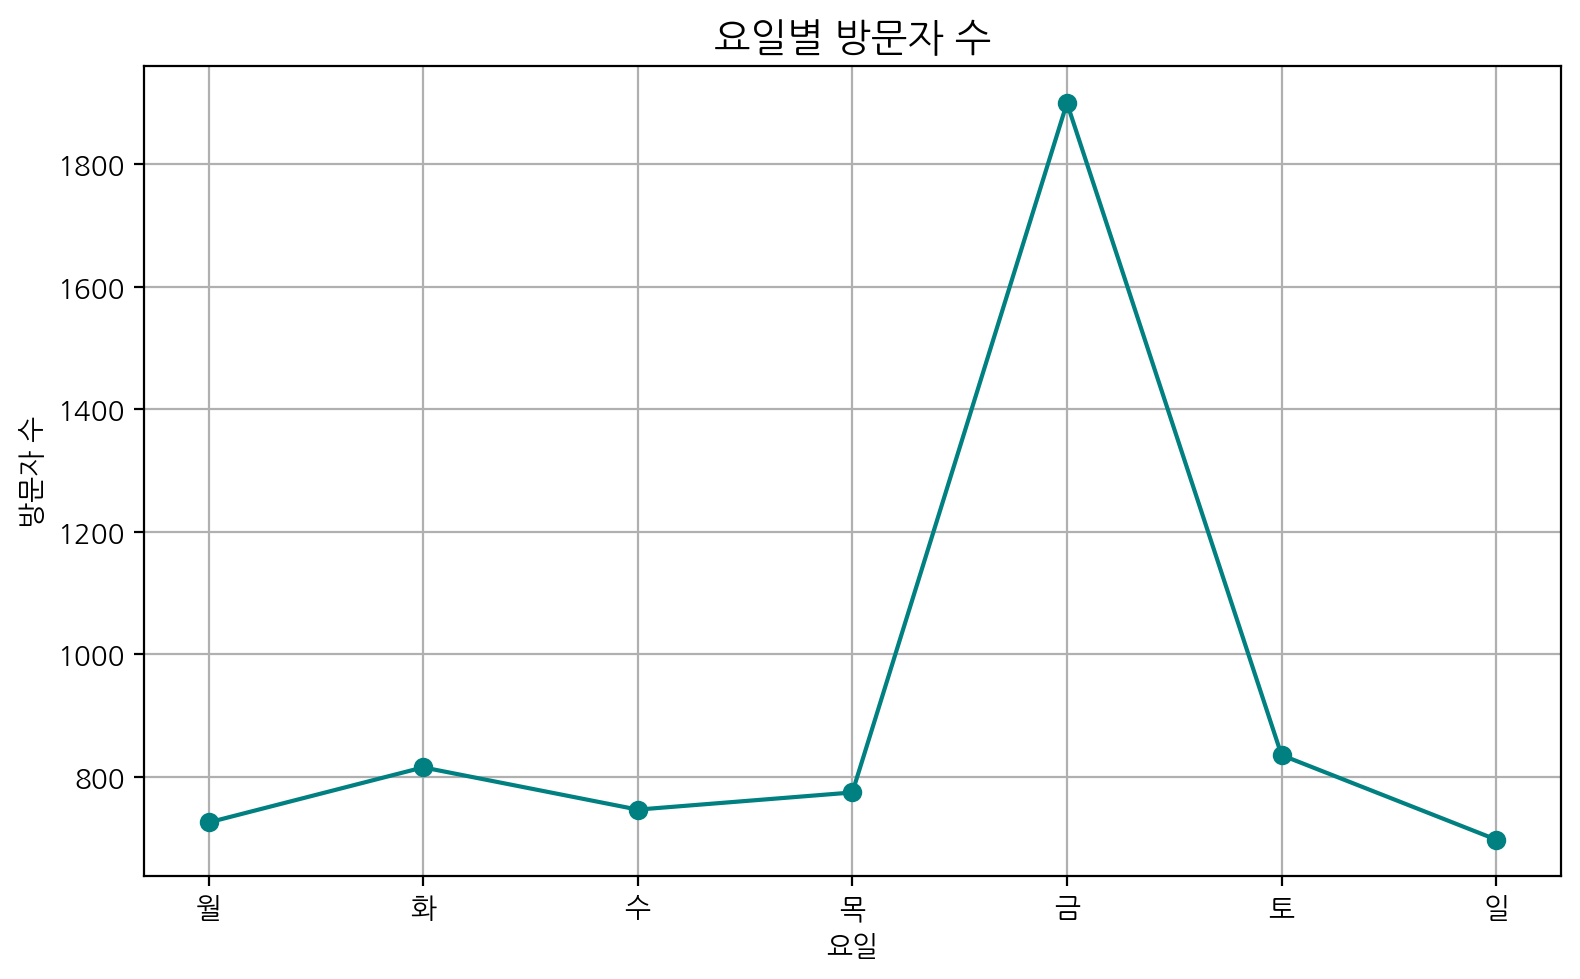

In [5]:
# 요일 정렬 순서 지정
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# 요일별 방문횟수 합산 + 요일 순서대로 정렬
weekday_sum = daily_visit_count.groupby('요일')['방문횟수'].sum().reindex(weekday_order)

# 선 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(weekday_sum.index, weekday_sum.values, marker='o', linestyle='-', color='teal')
plt.title('요일별 방문자 수', fontsize=14)
plt.xlabel('요일')
plt.ylabel('방문자 수')
plt.grid(True)
plt.tight_layout()
plt.show()

### 특정일 제외 후 시각화

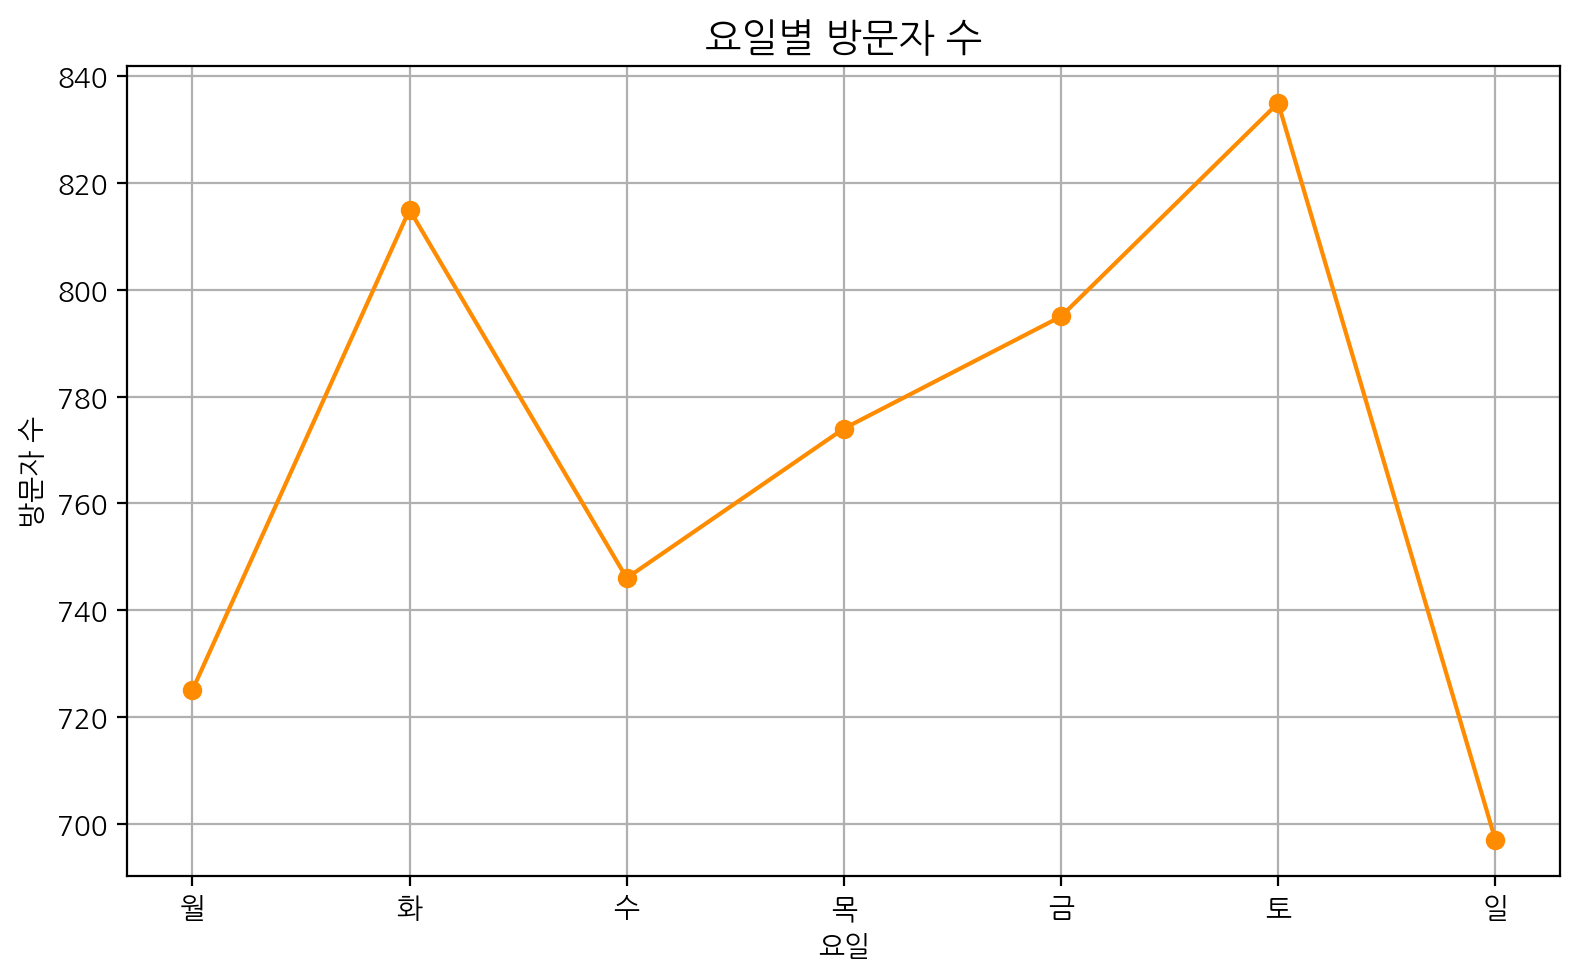

In [7]:
# 날짜 문자열을 datetime으로 변환
daily_visit_count['날짜'] = pd.to_datetime(daily_visit_count['날짜'])

# 2025-06-13 데이터 제거
df_filtered = daily_visit_count[daily_visit_count['날짜'] != '2025-06-13']

# 요일 정렬 순서
weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# 요일별 방문자 수 합계 (이상치 제거 후)
weekday_sum = df_filtered.groupby('요일')['방문횟수'].sum().reindex(weekday_order)

# 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(weekday_sum.index, weekday_sum.values, marker='o', linestyle='-', color='darkorange')
plt.title('요일별 방문자 수', fontsize=14)
plt.xlabel('요일')
plt.ylabel('방문자 수')
plt.grid(True)
plt.tight_layout()
plt.show()

# 무슨 시간대에 많이 방문할까?
- 16, 17, 18시 (저녁 시간대)

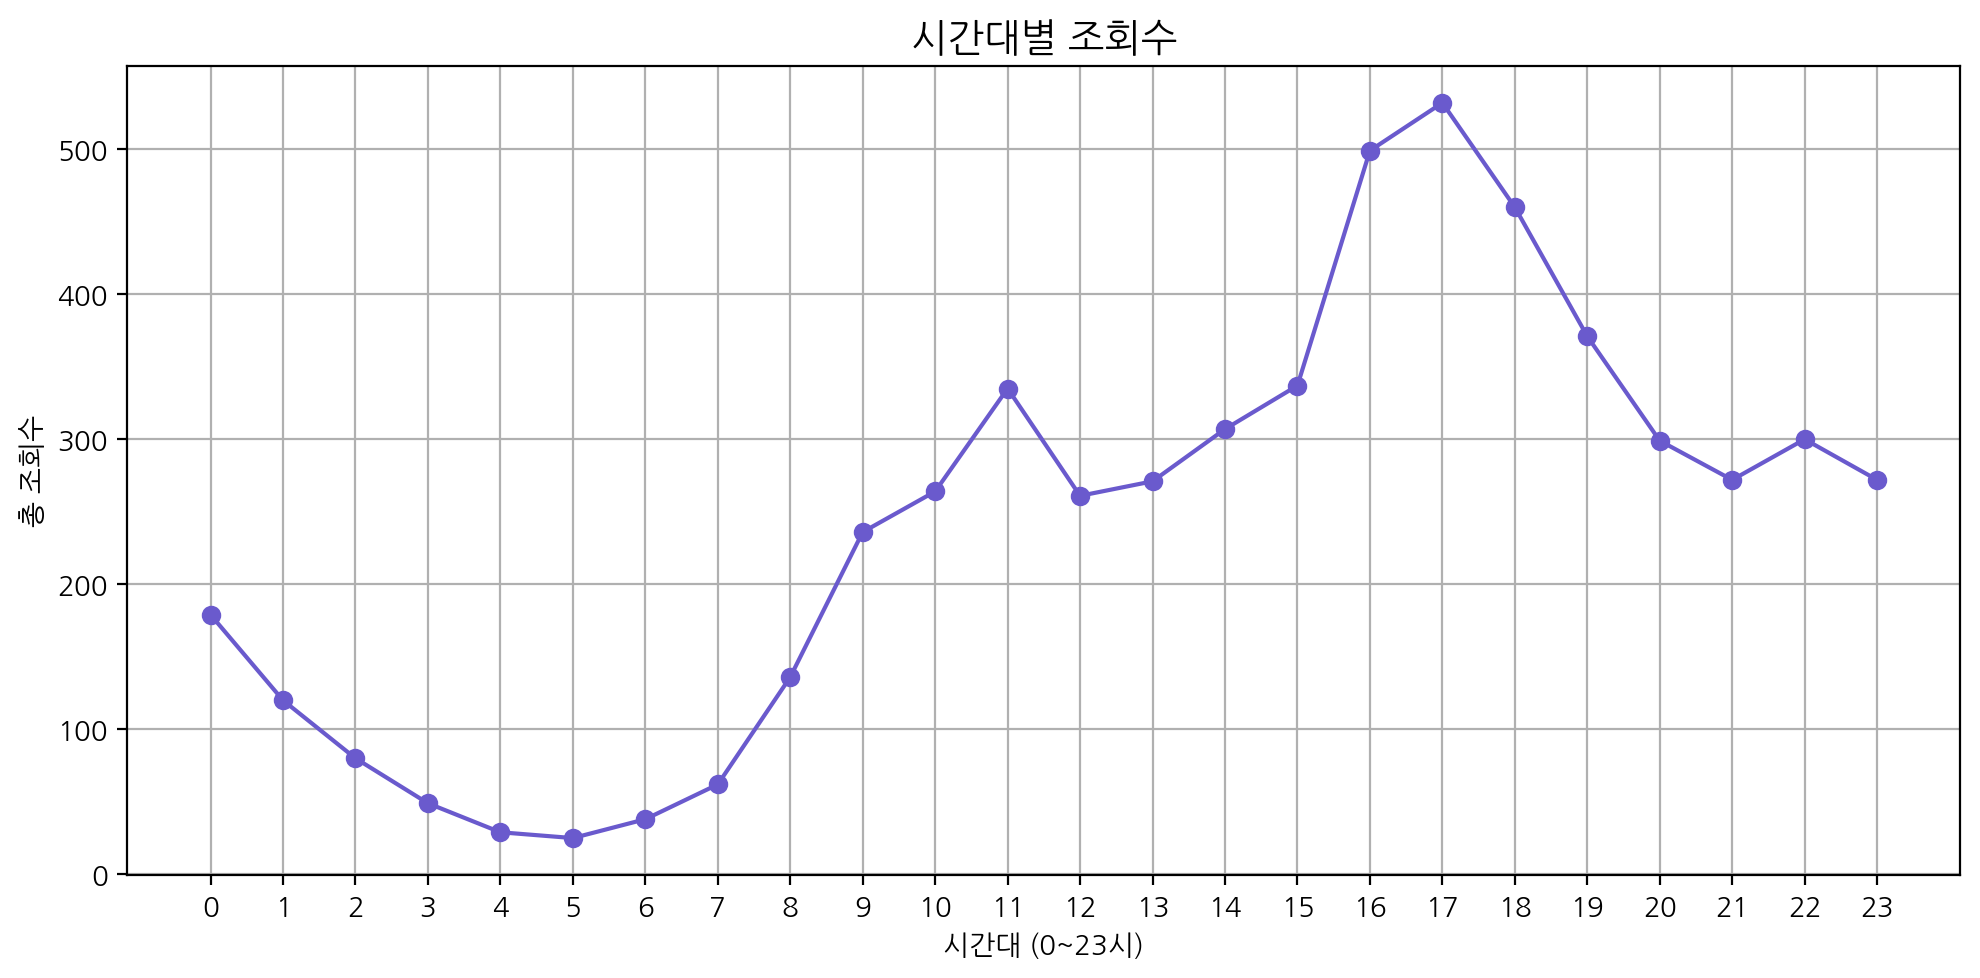

In [11]:
# 날짜를 datetime 형식으로 변환
all_time_df['날짜'] = pd.to_datetime(all_time_df['날짜'])

# 2025-06-13 제외
filtered_df = all_time_df[all_time_df['날짜'] != '2025-06-13']

# 시간대별 조회수 합산
hourly_views = filtered_df.groupby('시간대')['시간대 조회수'].sum()

plt.figure(figsize=(10, 5))
plt.plot(hourly_views.index, hourly_views.values, marker='o', color='slateblue')
plt.title('시간대별 조회수', fontsize=14)
plt.xlabel('시간대 (0~23시)')
plt.ylabel('총 조회수')
plt.xticks(range(0, 24))  # x축 눈금 0~23
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# filtered_df 데이터 프레임을 CSV 파일로 저장
filtered_df.to_csv('all_time.csv', index=False)

# 어느 경로로 유입이 될까?
- 월별 상위 3개 유입 경로가 '모바일'

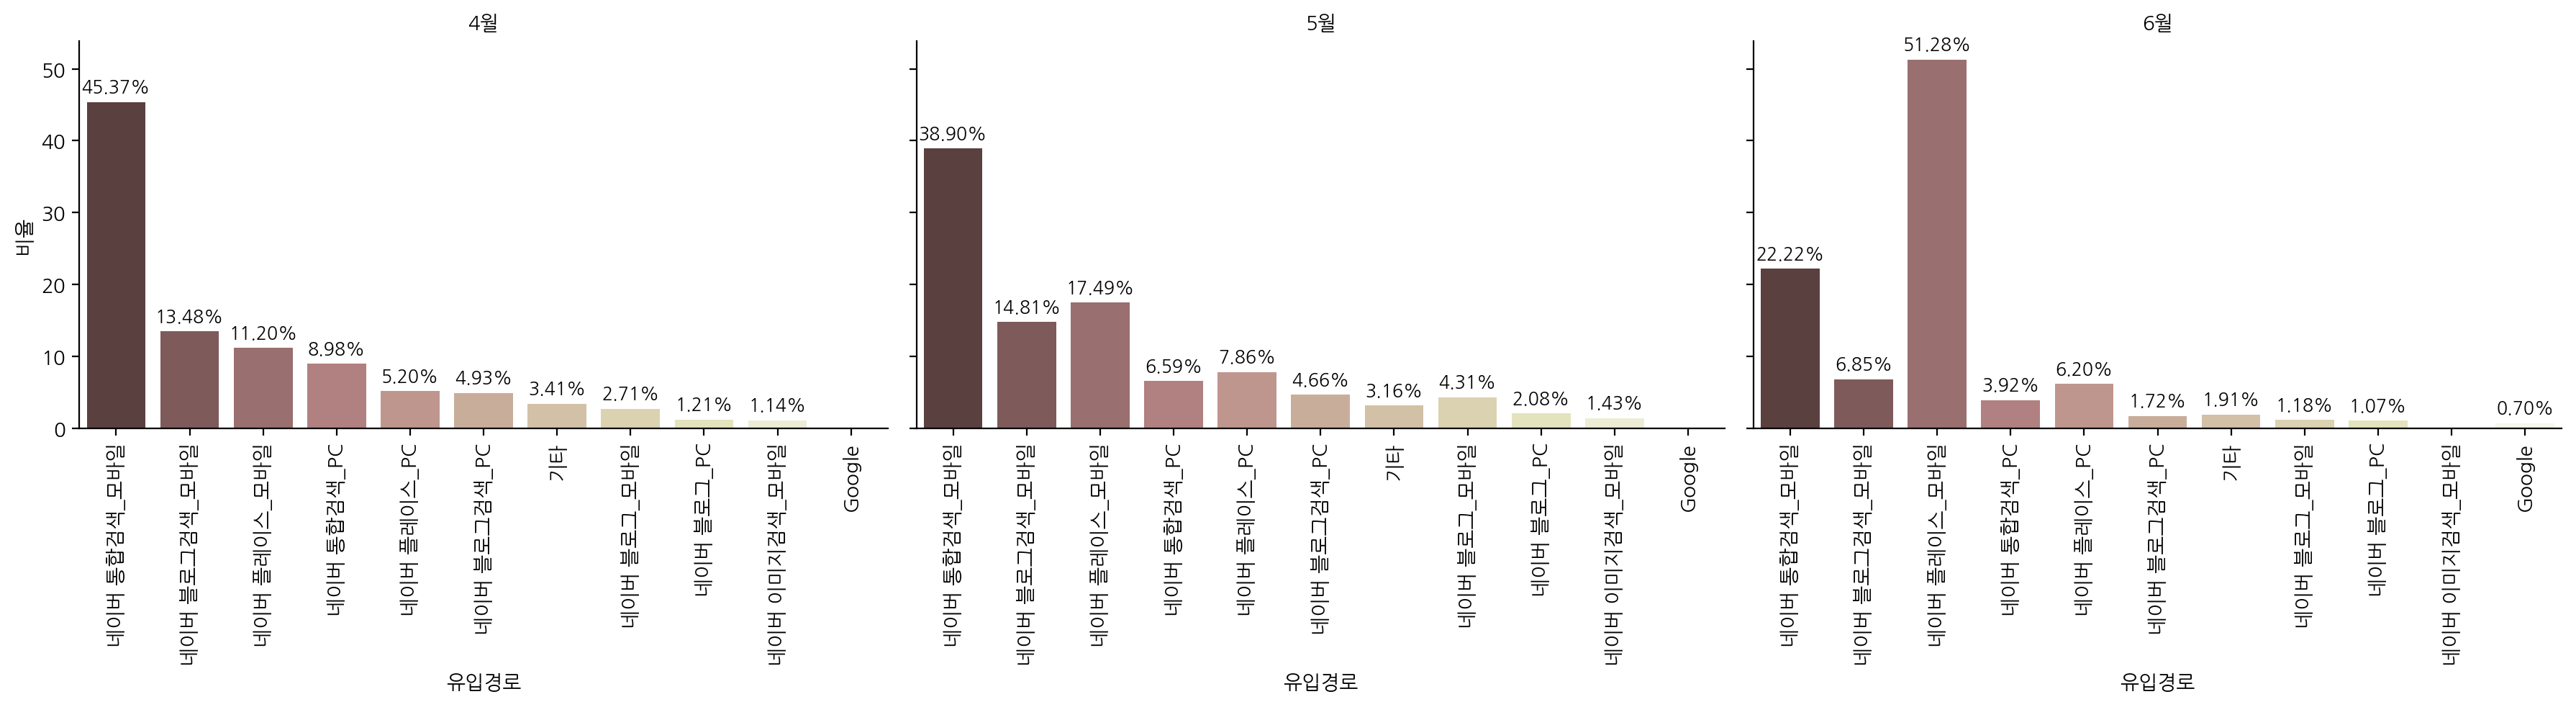

In [ ]:
# 월별 유입경로별 비율 합계
top_routes = (
    monthly_entry.groupby(['월', '유입경로'])['비율']
    .sum()
    .reset_index()
)

# 각 달별 상위 10개 추출
top10_each_month = (
    top_routes.sort_values(['월', '비율'], ascending=[True, False])
    .groupby('월')
    .head(10)
)

# 유입경로를 내림차순으로 정렬된 카테고리로 변환
top10_each_month['유입경로'] = top10_each_month.groupby('월')['유입경로'].transform(
    lambda x: pd.Categorical(x, categories=x.tolist()[::-1], ordered=True)
)

g = sns.catplot(
    data=top10_each_month,
    x='유입경로',
    y='비율',
    col='월',
    kind='bar',
    height=5,
    aspect=1.2,
    palette='pink'
)

# 막대 위 수치 추가
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.8,
            f'{height:.2f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

g.set_titles("{col_name}월")
g.set_axis_labels("유입경로", "비율")
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

# 어느 성별이 많이 방문을 할까?
- 맛집 블로그는 여자 방문 비율이 높다

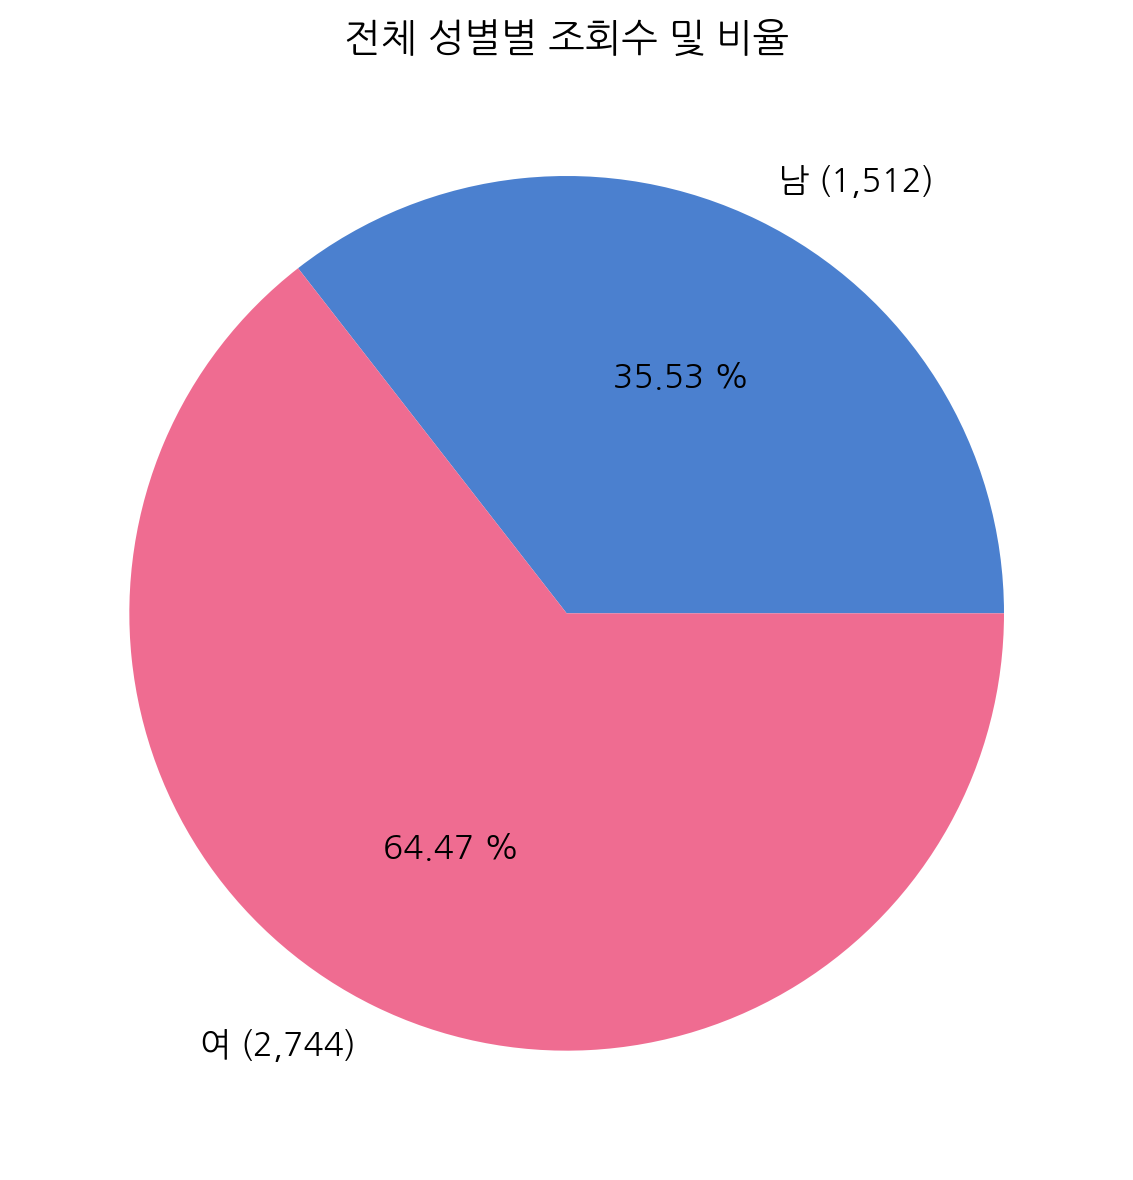

In [25]:
# 성별 전체 합계 추출 (연령별 == '전체' 조건)
gender_total = gender_age_456[gender_age_456['연령별'] == '전체']
gender_total_grouped = gender_total.groupby('성별')['조회수'].sum().reset_index()

labels = [f"{row['성별']} ({row['조회수']:,})" for _, row in gender_total_grouped.iterrows()]
sizes = gender_total_grouped['조회수']
colors = ['#4B80CF', '#EF6C91']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f %%', colors=colors, textprops={'fontsize': 12})
plt.title('전체 성별별 조회수 및 비율', fontsize=14)
plt.tight_layout()
plt.show()

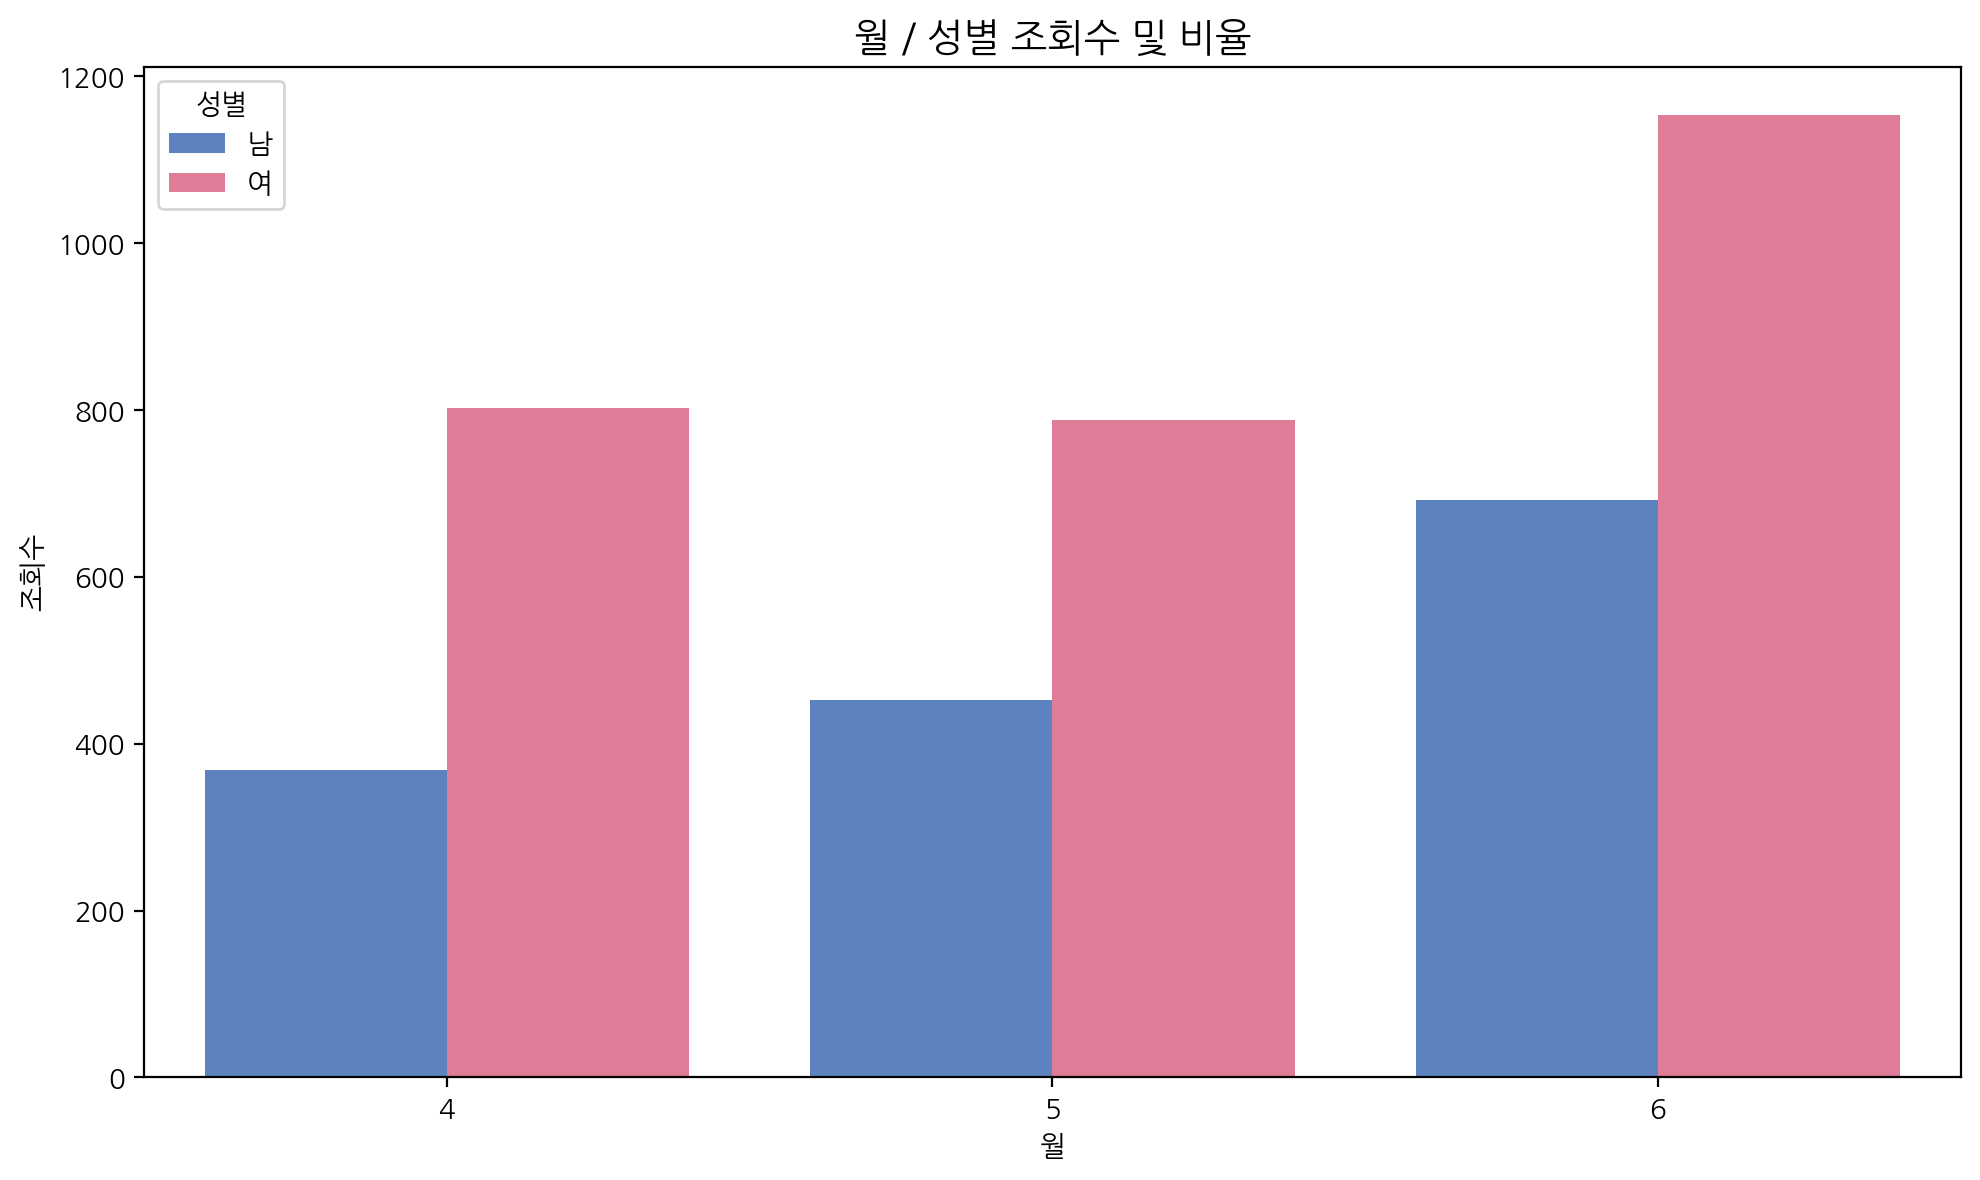

In [ ]:
# 연령별 == '전체' 데이터만 필터링
df_month_gender = gender_age_456[gender_age_456['연령별'] == '전체']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_month_gender,
    x='월', y='조회수', hue='성별',
    palette={'남': '#4B80CF', '여': '#EF6C91'}
)

plt.title("월 / 성별 조회수 및 비율", fontsize=14)
plt.ylabel("조회수")
plt.tight_layout()
plt.show()

# 나이대는 어떻게 분포 되어 있을까?
- 대체로 20대 중반 ~ 30대 중반 여성 분들이 많이 방문

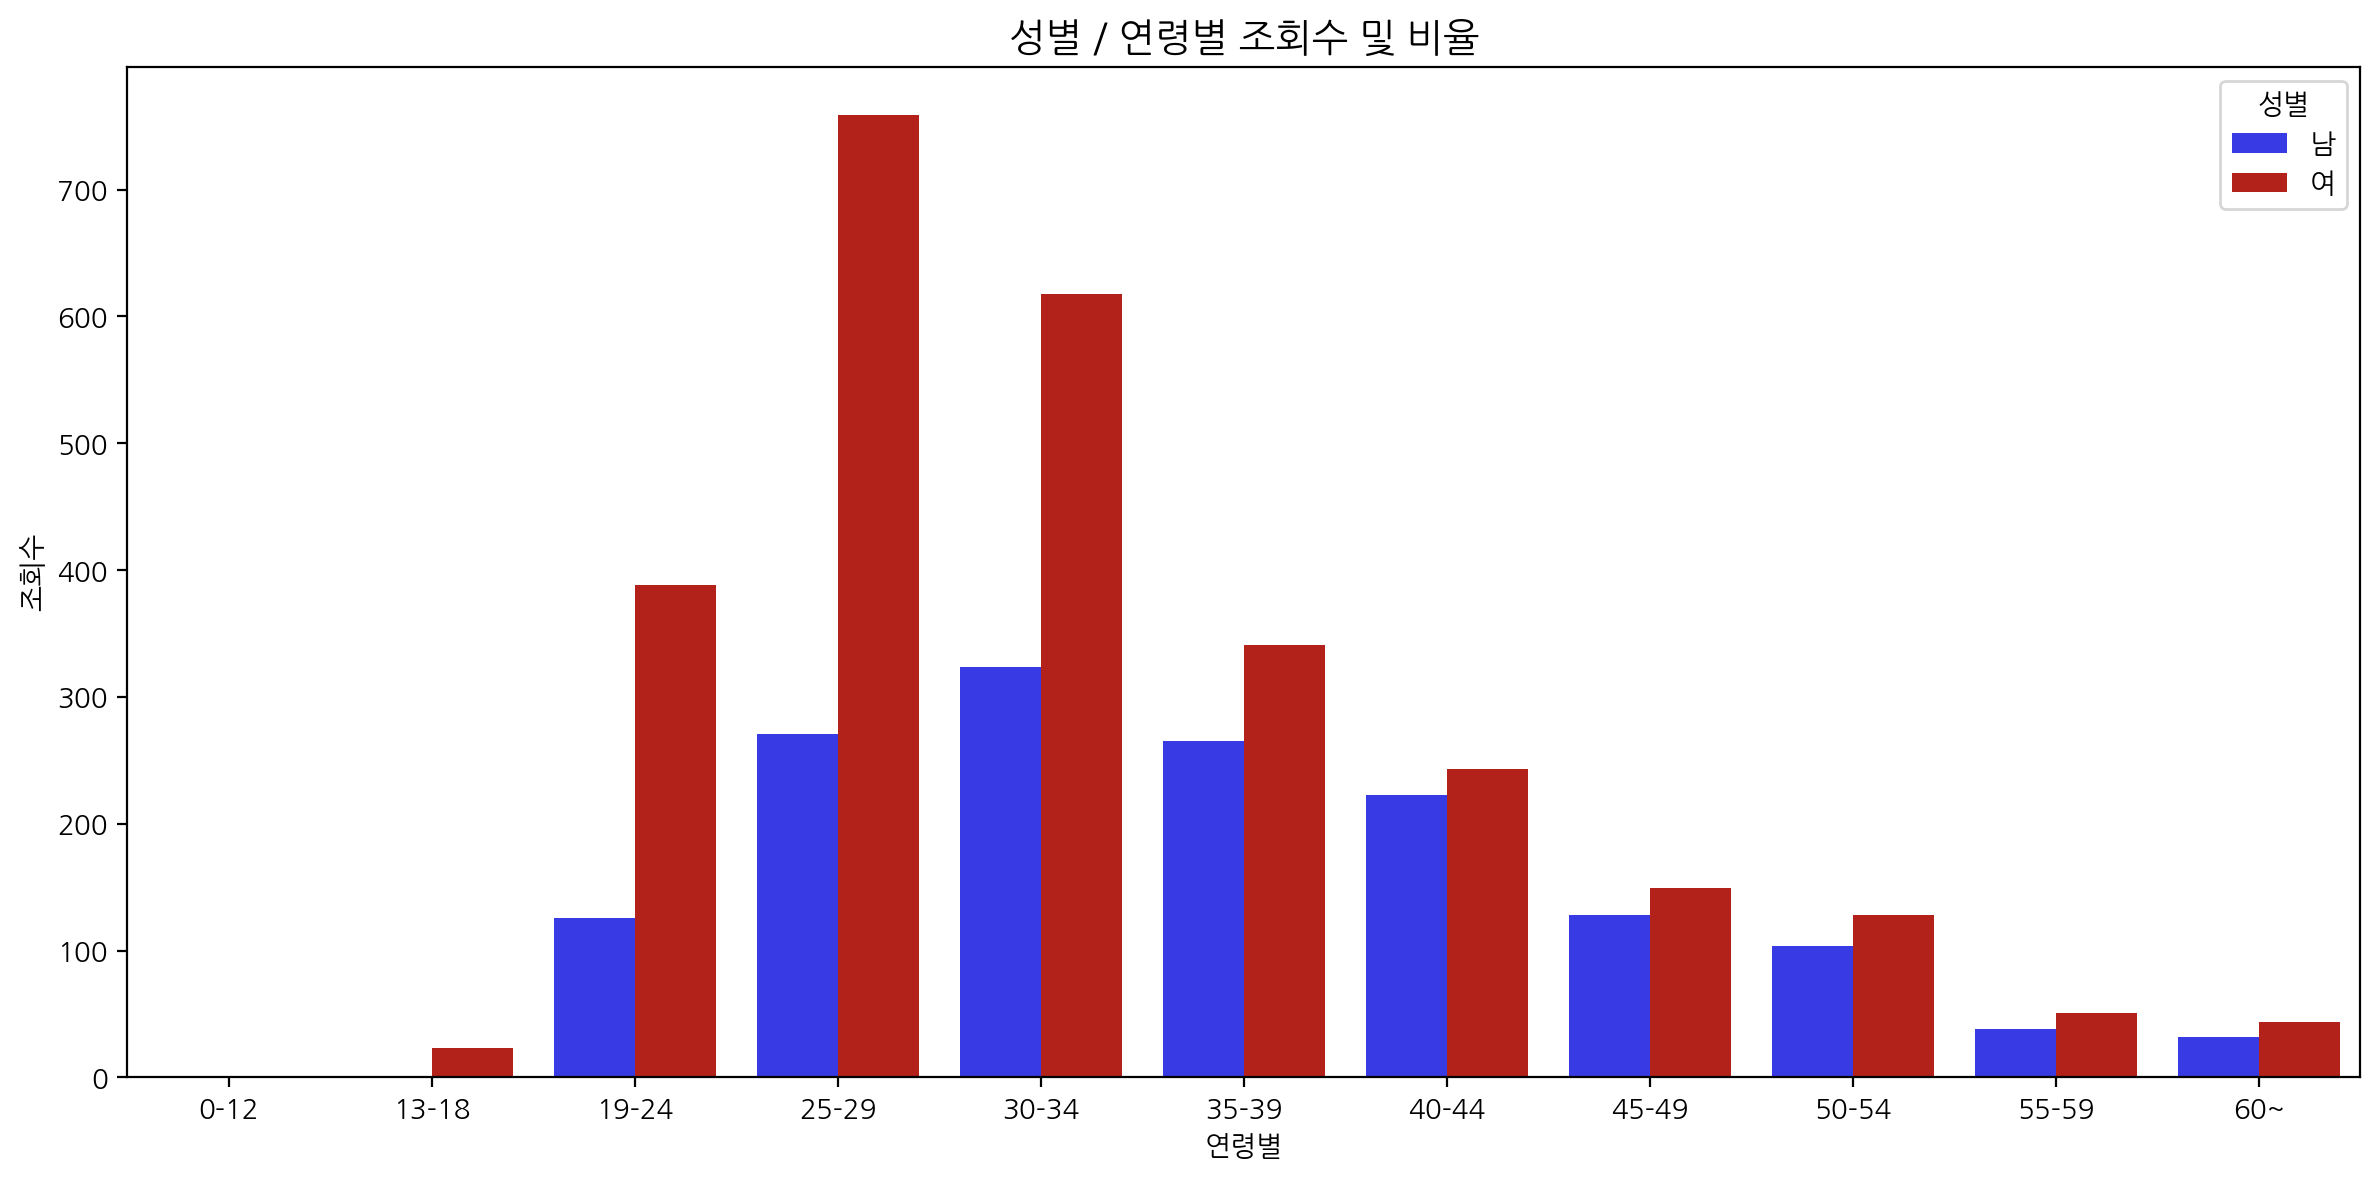

In [36]:
# 전체 월 합산 & 성별/연령별만 남기기
df_age_gender = gender_age_456[
    (gender_age_456['연령별'] != '전체') & (gender_age_456['성별'].isin(['남', '여']))
].copy()

# 월별 합치기 → 연령/성별 기준으로 조회수, 비율 합산
df_age_gender = df_age_gender.groupby(['연령별', '성별'], as_index=False)[['조회수', '비율(%)']].sum()

# 연령대 순서 지정
age_order = ['0-12', '13-18', '19-24', '25-29', '30-34', '35-39',
             '40-44', '45-49', '50-54', '55-59', '60~']
df_age_gender['연령별'] = pd.Categorical(df_age_gender['연령별'], categories=age_order, ordered=True)
df_age_gender = df_age_gender.sort_values('연령별')

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_age_gender,
    x='연령별', y='조회수', hue='성별',
    palette={'남': '#1B20FF', '여': '#CB0C01'}
)


plt.title("성별 / 연령별 조회수 및 비율", fontsize=14)
plt.ylabel("조회수")
plt.xlabel("연령별")
plt.legend(title="성별")
plt.tight_layout()
plt.show()